Praktikum Week 6
Ricky Jonathan H. T - 0706022210005


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
# Step 2: Load dataset dari URL
url = "https://raw.githubusercontent.com/Mypeepee/Dataset---Datamining/refs/heads/main/breast-cancer.csv"
data = pd.read_csv(url)  # Membaca file CSV dan memuatnya sebagai DataFrame
print("Data Sample:")
data.sample(10)

Data Sample:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
308,893526,B,13.500,12.71,85.69,566.2,0.07376,0.03614,0.002758,0.004419,...,14.97,16.94,95.48,698.7,0.09023,0.05836,0.01379,0.02210,0.2267,0.06192
237,883263,M,20.480,21.46,132.50,1306.0,0.08355,0.08348,0.090420,0.060220,...,24.22,26.17,161.70,1750.0,0.12280,0.23110,0.31580,0.14450,0.2238,0.07127
320,894604,B,10.250,16.18,66.52,324.2,0.10610,0.11110,0.067260,0.039650,...,11.28,20.61,71.53,390.4,0.14020,0.23600,0.18980,0.09744,0.2608,0.09702
522,91789,B,11.260,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,...,11.93,26.43,76.38,435.9,0.11080,0.07723,0.02533,0.02832,0.2557,0.07613
60,858970,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.010840,0.012900,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
282,89122,M,19.400,18.18,127.20,1145.0,0.10370,0.14420,0.162600,0.094640,...,23.79,28.65,152.40,1628.0,0.15180,0.37490,0.43160,0.22520,0.3590,0.07787
123,865432,B,14.500,10.89,94.28,640.7,0.11010,0.10990,0.088420,0.057780,...,15.70,15.98,102.80,745.5,0.13130,0.17880,0.25600,0.12210,0.2889,0.08006
369,9012000,M,22.010,21.90,147.20,1482.0,0.10630,0.19540,0.244800,0.150100,...,27.66,25.80,195.00,2227.0,0.12940,0.38850,0.47560,0.24320,0.2741,0.08574
102,862965,B,12.180,20.52,77.22,458.7,0.08013,0.04038,0.023830,0.017700,...,13.34,32.84,84.58,547.8,0.11230,0.08862,0.11450,0.07431,0.2694,0.06878
467,9113514,B,9.668,18.10,61.06,286.3,0.08311,0.05428,0.014790,0.005769,...,11.15,24.62,71.11,380.2,0.13880,0.12550,0.06409,0.02500,0.3057,0.07875


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# Menampilkan jumlah nilai unik dari setiap kolom
unique_counts = data.nunique()
print("Jumlah nilai unik di setiap kolom:\n", unique_counts)

# Menampilkan daftar nilai unik untuk setiap kolom (opsional)


Jumlah nilai unik di setiap kolom:
 id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fra

In [9]:
print(data['diagnosis'].value_counts(dropna=False))
# The dataset has more outcomes of B (almost 2x the M value)
# B stands for Benign or non-cancerous, while M stands for Malignant (cancerous)

diagnosis
B    357
M    212
Name: count, dtype: int64


In [10]:
data_cleaned = data.dropna()

print("Null values per column after dropna:\n", data_cleaned.isnull().sum())


Null values per column after dropna:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Mengecek apakah ada null value, jika ada kita drop


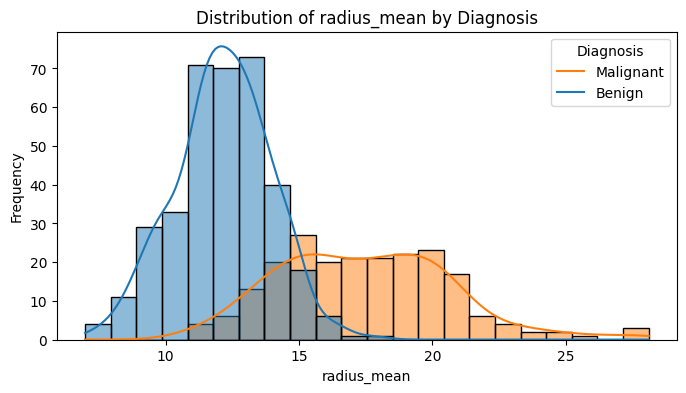

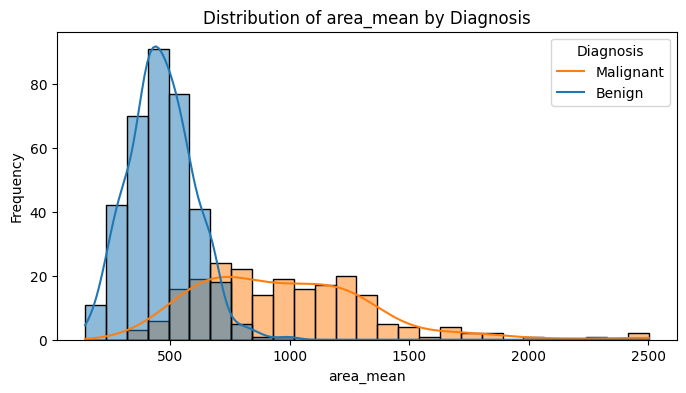

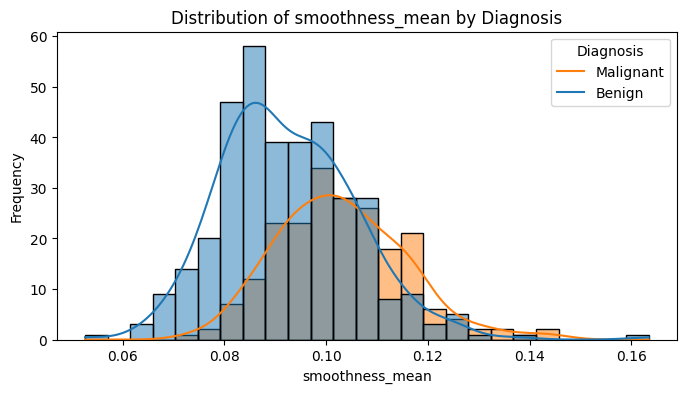

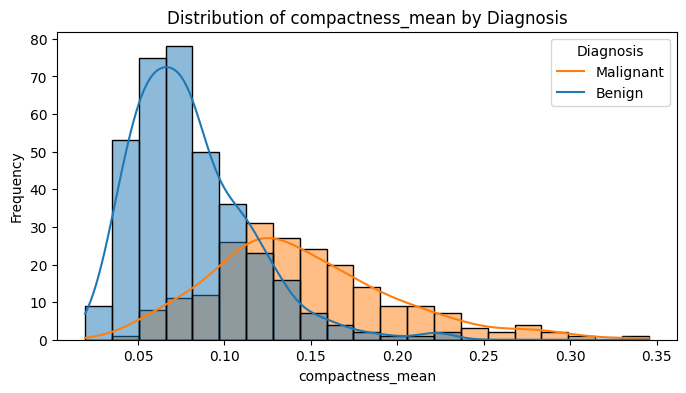

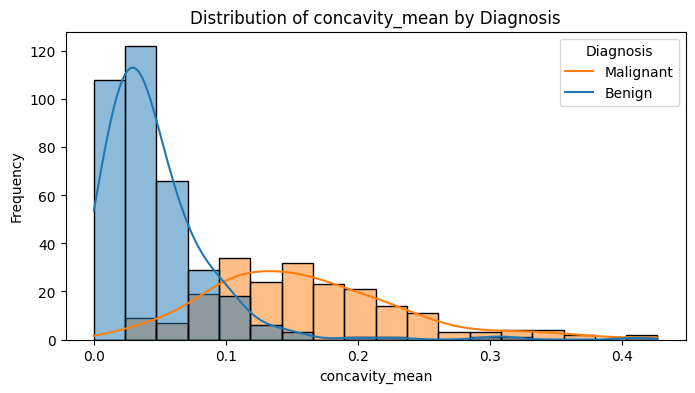

In [21]:
key_features = ['radius_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean']

for feature in key_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=feature, hue='diagnosis', kde=True)
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Diagnosis', labels=['Malignant', 'Benign'])
    plt.show()

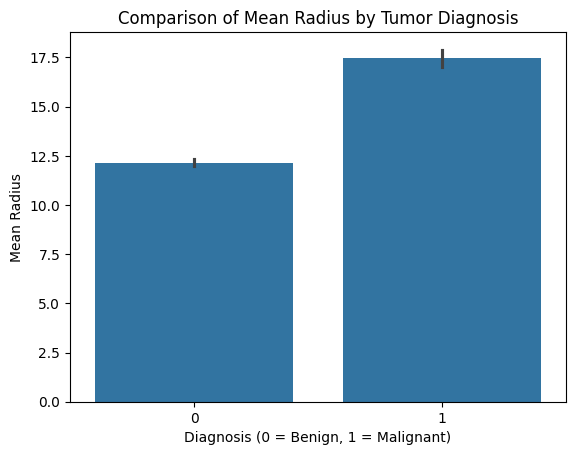

In [23]:
sns.barplot(x=data['diagnosis'], y=data['radius_mean'])


plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Mean Radius')
plt.title('Comparison of Mean Radius by Tumor Diagnosis')
plt.show()

In [28]:
x = data.drop(columns=['diagnosis'])
y = data['diagnosis']=='M' # 1 if malignant, 0 else

<Axes: >

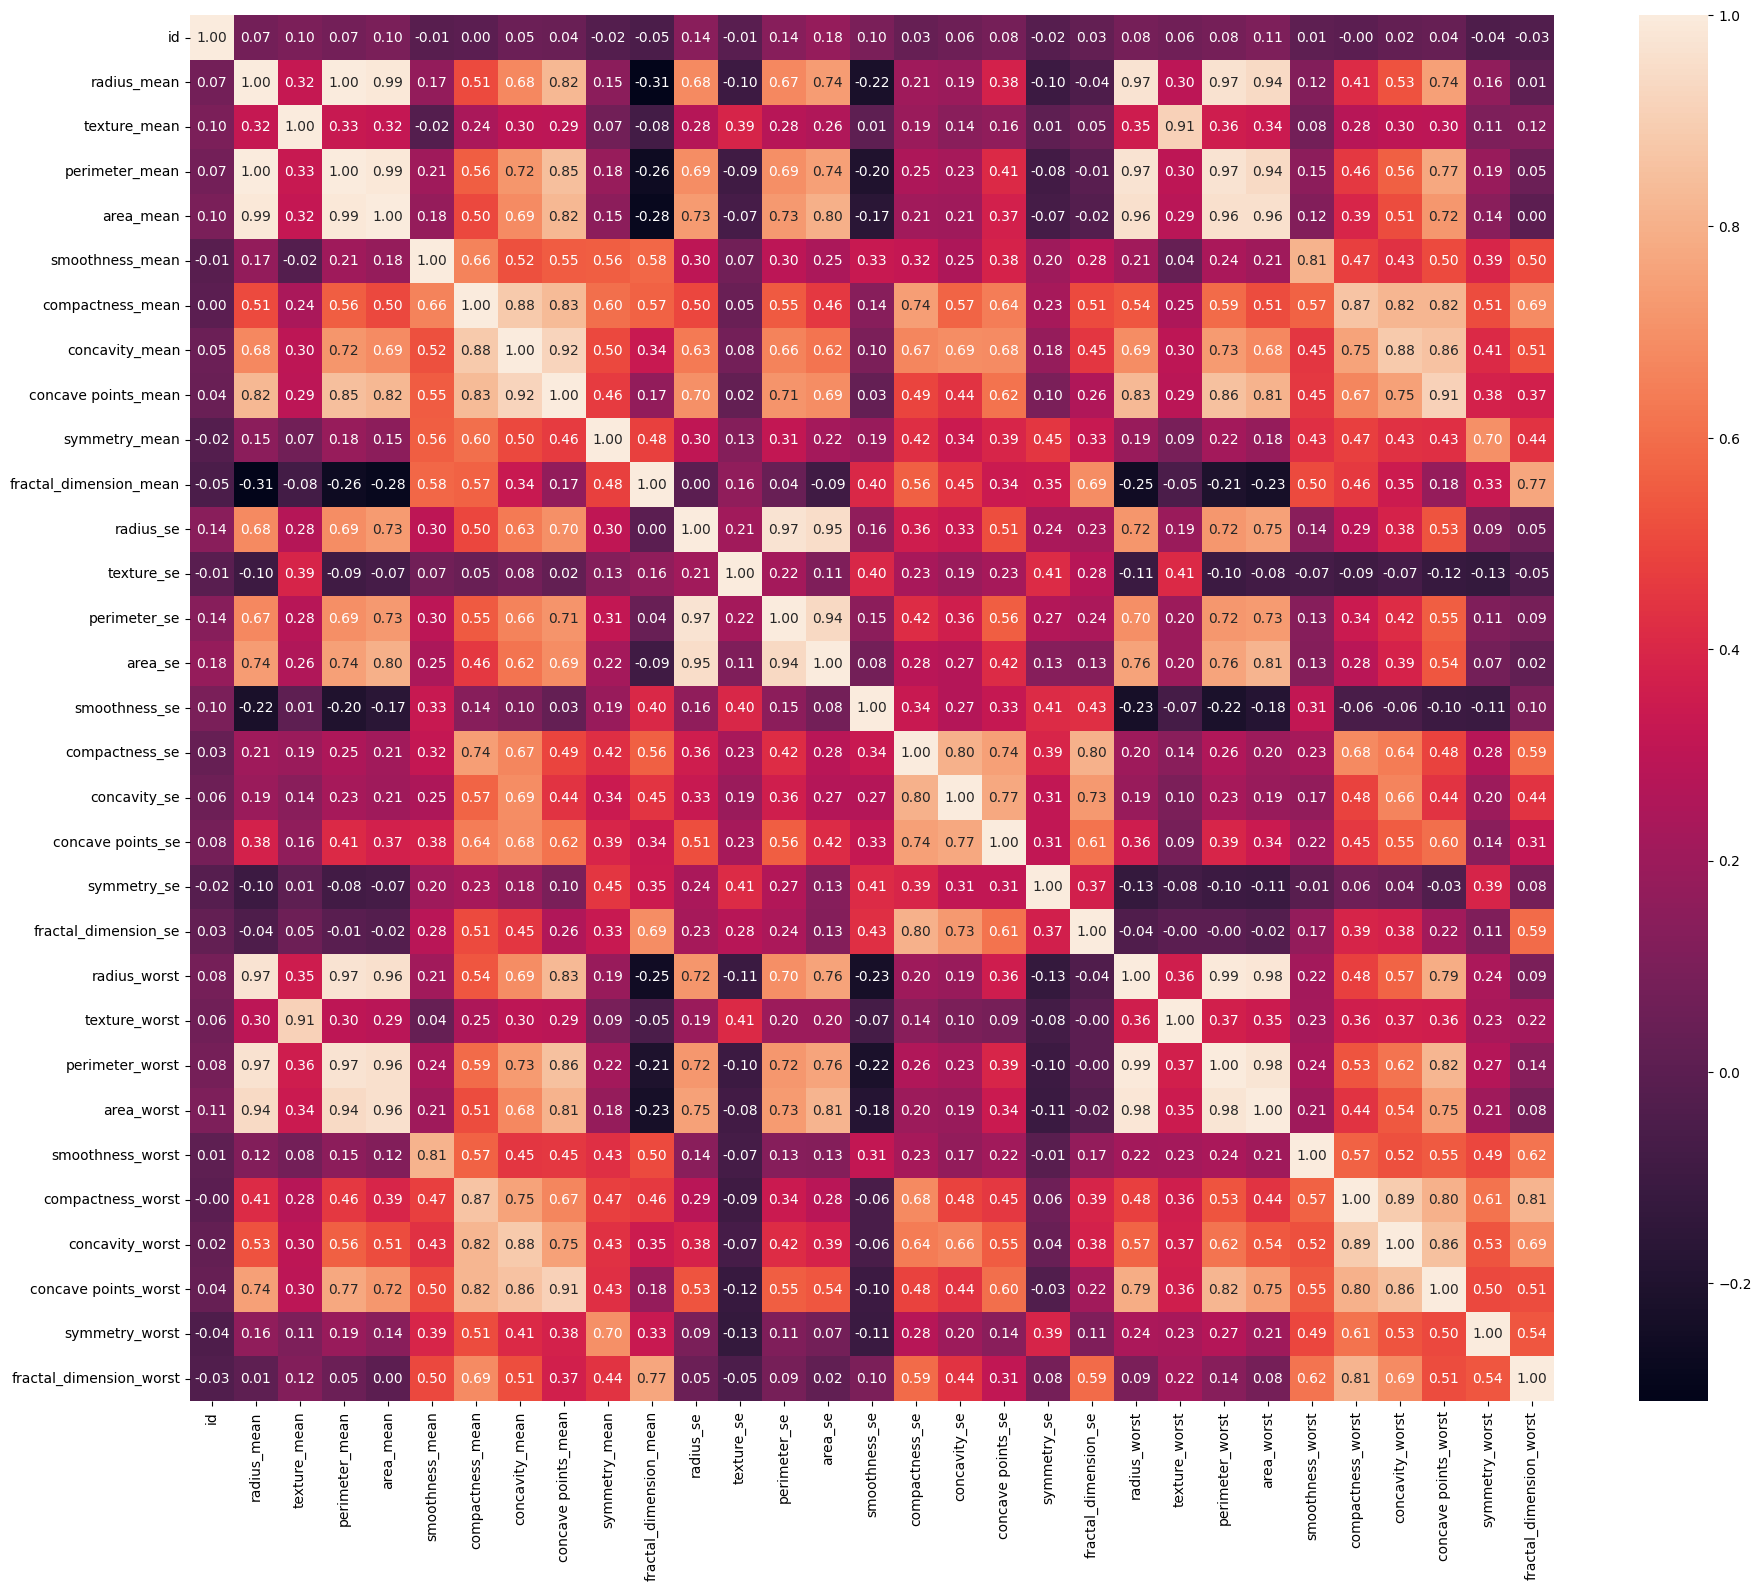

In [29]:
plt.figure(figsize=(22,18))
sns.heatmap(data=x.corr(), fmt = '0.2f', annot=True)

In [18]:

label_encoder = LabelEncoder()

data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

data.sample(n = 10)

# Using label encoder to encode the categorical columns (target variable: diagnosis)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
299,892399,0,10.510,23.09,66.85,334.2,0.10150,0.06797,0.024950,0.01875,...,10.93,24.22,70.10,362.7,0.11430,0.08614,0.04158,0.03125,0.2227,0.06777
42,855625,1,19.070,24.81,128.30,1104.0,0.09081,0.21900,0.210700,0.09961,...,24.09,33.17,177.40,1651.0,0.12470,0.74440,0.72420,0.24930,0.4670,0.10380
424,907145,0,9.742,19.12,61.93,289.7,0.10750,0.08333,0.008934,0.01967,...,11.21,23.17,71.79,380.9,0.13980,0.13520,0.02085,0.04589,0.3196,0.08009
170,87139402,0,12.320,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.03700,...,13.50,15.64,86.97,549.1,0.13850,0.12660,0.12420,0.09391,0.2827,0.06771
402,904689,0,12.960,18.29,84.18,525.2,0.07351,0.07899,0.040570,0.01883,...,14.13,24.61,96.31,621.9,0.09329,0.23180,0.16040,0.06608,0.3207,0.07247
518,917062,0,12.880,18.22,84.45,493.1,0.12180,0.16610,0.048250,0.05303,...,15.05,24.37,99.31,674.7,0.14560,0.29610,0.12460,0.10960,0.2582,0.08893
172,87164,1,15.460,11.89,102.50,736.9,0.12570,0.15550,0.203200,0.10970,...,18.79,17.04,125.00,1102.0,0.15310,0.35830,0.58300,0.18270,0.3216,0.10100
516,916799,1,18.310,20.58,120.80,1052.0,0.10680,0.12480,0.156900,0.09451,...,21.86,26.20,142.20,1493.0,0.14920,0.25360,0.37590,0.15100,0.3074,0.07863
251,88518501,0,11.500,18.45,73.28,407.4,0.09345,0.05991,0.026380,0.02069,...,12.97,22.46,83.12,508.9,0.11830,0.10490,0.08105,0.06544,0.2740,0.06487
280,8912049,1,19.160,26.60,126.20,1138.0,0.10200,0.14530,0.192100,0.09664,...,23.72,35.90,159.80,1724.0,0.17820,0.38410,0.57540,0.18720,0.3258,0.09720


In [30]:
# 1. Decision Tree (Criterion Entropy) Classification

X = data.drop(['diagnosis', 'id'], axis = 1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Next is to divide the dataset into 80% train data (for training the model), and 20% testing data.

Decision Tree


In [31]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [32]:
y_pred_en = clf_en.predict(X_test)

In [33]:

y_train_en = clf_en.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_en)
training_accuracy = accuracy_score(y_train, y_train_en)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))


Testing accuracy: 0.9561
Training accuracy: 0.9802


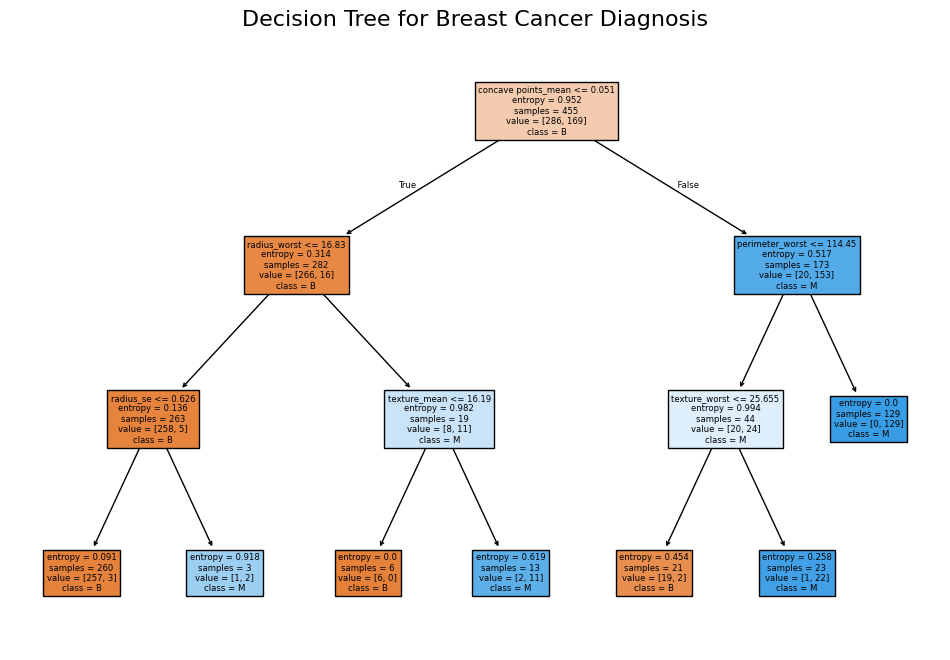

In [34]:

from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_en, feature_names=X.columns, class_names=["B", "M"], filled=True)
plt.title('Decision Tree for Breast Cancer Diagnosis', fontsize=16)
plt.show()


In [37]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)
y_train_gini = clf_gini.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_gini)
training_accuracy = accuracy_score(y_train, y_train_gini)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))


Testing accuracy: 0.9386
Training accuracy: 0.9780


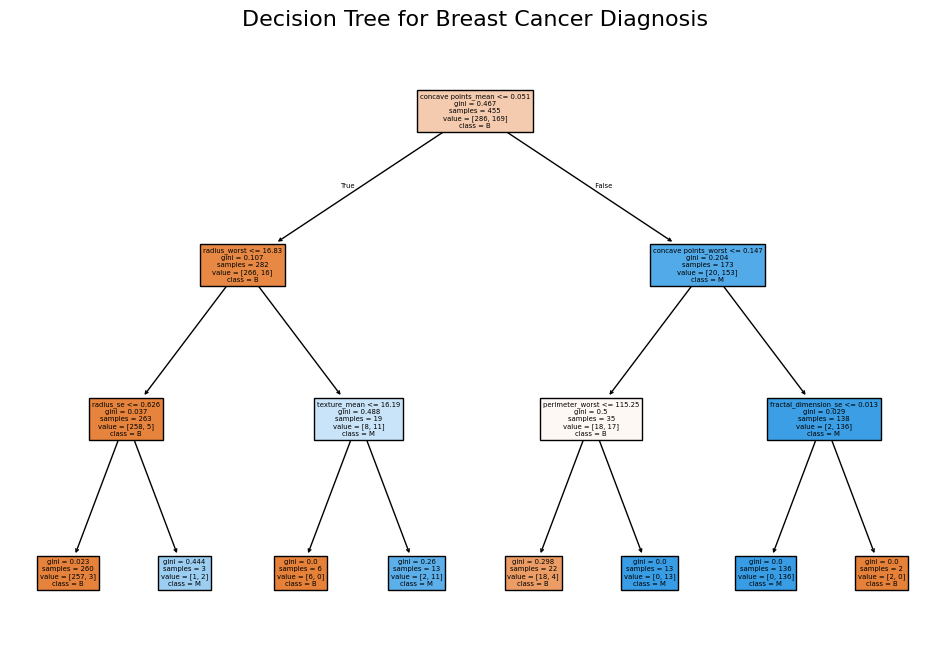

In [38]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, feature_names=X.columns, class_names=['B', 'M'], filled=True)
plt.title('Decision Tree for Breast Cancer Diagnosis', fontsize=16)
plt.show()


In [39]:
conf_matrix_en = confusion_matrix(y_test, y_pred_en)
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix Entropy:\n", conf_matrix_en)
print("Confusion Matrix Gini Index:\n", conf_matrix_gini)


Confusion Matrix Entropy:
 [[70  1]
 [ 4 39]]
Confusion Matrix Gini Index:
 [[68  3]
 [ 4 39]]


In [41]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_train_nb = nb.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_nb)
training_accuracy = accuracy_score(y_train, y_train_nb)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))


Testing accuracy: 0.9737
Training accuracy: 0.9363


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [43]:

y_pred_rf = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)

y_train_rf = nb.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_rf)
training_accuracy = accuracy_score(y_train, y_train_rf)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))


Testing accuracy: 0.9649
Training accuracy: 0.9363


In [44]:
cm_en = confusion_matrix(y_test, y_pred_en)
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix Entropy:")
print(cm_en)
print("\nConfusion Matrix Gini:")
print(cm_gini)
print("\nConfusion Matrix Naive Bayes:")
print(cm_nb)
print("\nConfusion Matrix Random Forest:")
print(cm_rf)

Confusion Matrix Entropy:
[[70  1]
 [ 4 39]]

Confusion Matrix Gini:
[[68  3]
 [ 4 39]]

Confusion Matrix Naive Bayes:
[[71  0]
 [ 3 40]]

Confusion Matrix Random Forest:
[[70  1]
 [ 3 40]]


In [47]:



# From the results above (especially accuracy), we can conclude that these 4 models all generate almost perfect results.
# Naive Bayes might have the absolute best, but it does not mean too much compared to the others.
# Overall, all models are balanced at predicting both diagnosis.
# For future predictions, all four models could be used, and be compared with each other to define which is the most accurate for even further diagnosis.
# Note: since the predicting columns are 30, with some correlation number to the target variable being high, it is safe to say that the dataset have enough data to make predictions.